# Diagnóstico Exploratorio Sobre Ventas de Gas Natural Vehicular en Colombia

Este análisis se basa en el conjunto de datos públicos “Consulta Ventas de Gas Natural Comprimido Vehicular (GNCV)”, publicado por el Ministerio de Minas y Energía a través del portal de Datos Abiertos. Esta base proporciona información detallada sobre la comercialización de GNCV en estaciones de servicio del país, con el fin de hacer seguimiento al consumo y distribución de este combustible limpio en el sector transporte.

El objetivo principal es entender cómo se comportan las ventas de GNCV a lo largo del tiempo y en diferentes regiones del país, con el propósito de contribuir a la toma de decisiones energéticas y de movilidad sostenible.

# ¿Qué hay en este conjunto de datos?
Este estudio incluye las siguientes variables:

- FECHA_VENTA: Fecha exacta de la transacción (año, mes, día).

- AÑO, MES, DIA: Descomposición de la fecha para análisis temporal.

- CODIGO_MUNICIPIO_DANE: Código único de identificación del municipio.

- DEPARTAMENTO, MUNICIPIO: Ubicación geográfica de la estación de servicio.

- LATITUD, LONGITUD: Coordenadas de localización para análisis espacial.

- TIPO_AGENTE: Generalmente “Estación de servicio de GNCV”.

-  TIPO_DE_COMBUSTIBLE: Tipo de combustible vendido, en este caso, GNV (Gas Natural Vehicular).

- EDS_ACTIVAS: Número de estaciones de servicio activas que reportan ventas.

- NUMERO_DE_VENTAS: Total de transacciones de venta realizadas.

- VEHICULOS_ATENDIDOS: Cantidad de vehículos que fueron abastecidos.

- CANTIDAD_VOLUMEN_SUMINISTRADO: Volumen total de gas suministrado (en metros cúbicos).

# Importación de librerias

In [25]:
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
from scipy.stats import shapiro, normaltest, anderson
import matplotlib.pyplot as plt
import seaborn as sns

# Importacion, Diagnostico y Tratamiento De Los Datos

In [27]:
df = pd.read_csv('consulta_ventas_gas_natural.csv')

In [28]:
df.head()

,FECHA_VENTA,ANIO_VENTA,MES_VENTA,DIA_VENTA,CODIGO_MUNICIPIO_DANE,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,TIPO_AGENTE,TIPO_DE_COMBUSTIBLE,EDS_ACTIVAS,NUMERO_DE_VENTAS,VEHICULOS_ATENDIDOS,CANTIDAD_VOLUMEN_SUMINISTRADO
0,2023-03-04,2023,3,4,73001,TOLIMA,IBAGUE,4.432248,-75.194252,ESTACION DE SERVICIO DE GNCV,GNV,11,4623,2158,30137.81
1,2022-01-31,2022,1,31,25843,CUNDINAMARCA,VILLA DE SAN DIEGO DE UBATE,5.307463,-73.814369,ESTACION DE SERVICIO DE GNCV,GNV,1,130,100,1669.43
2,2023-01-28,2023,1,28,19001,CAUCA,POPAYAN,2.459641,-76.599380,ESTACION DE SERVICIO DE GNCV,GNV,1,151,102,1242.32
3,2024-07-28,2024,7,28,73001,TOLIMA,IBAGUE,4.432248,-75.194252,ESTACION DE SERVICIO DE GNCV,GNV,12,4746,2279,26712.42
4,2023-02-02,2023,2,2,5631,ANTIOQUIA,SABANETA,6.149903,-75.615479,ESTACION DE SERVICIO DE GNCV,GNV,1,148,135,1596.04


In [29]:
print("[+] Dimensiones del dataset [+]\n")
print(f'\t{df.shape}')

[+] Dimensiones del dataset [+]

	(125048, 15)


In [30]:
print("\t[TIPO DE DATOS POR COLUMNA]\n")
df.dtypes

	[TIPO DE DATOS POR COLUMNA]



FECHA_VENTA                       object
ANIO_VENTA                         int64
MES_VENTA                          int64
DIA_VENTA                          int64
CODIGO_MUNICIPIO_DANE              int64
DEPARTAMENTO                      object
MUNICIPIO                         object
LATITUD                          float64
LONGITUD                         float64
TIPO_AGENTE                       object
TIPO_DE_COMBUSTIBLE               object
EDS_ACTIVAS                        int64
NUMERO_DE_VENTAS                   int64
VEHICULOS_ATENDIDOS                int64
CANTIDAD_VOLUMEN_SUMINISTRADO    float64
dtype: object

In [31]:
print("\t[VALORES NULOS POR COLUMNA]")
df.isnull().sum()

	[VALORES NULOS POR COLUMNA]


FECHA_VENTA                      0
ANIO_VENTA                       0
MES_VENTA                        0
DIA_VENTA                        0
CODIGO_MUNICIPIO_DANE            0
DEPARTAMENTO                     0
MUNICIPIO                        0
LATITUD                          0
LONGITUD                         0
TIPO_AGENTE                      0
TIPO_DE_COMBUSTIBLE              0
EDS_ACTIVAS                      0
NUMERO_DE_VENTAS                 0
VEHICULOS_ATENDIDOS              0
CANTIDAD_VOLUMEN_SUMINISTRADO    0
dtype: int64

In [32]:
print("\t[VALORES NaN POR COLUMNA]")
df.isna().sum()

	[VALORES NaN POR COLUMNA]


FECHA_VENTA                      0
ANIO_VENTA                       0
MES_VENTA                        0
DIA_VENTA                        0
CODIGO_MUNICIPIO_DANE            0
DEPARTAMENTO                     0
MUNICIPIO                        0
LATITUD                          0
LONGITUD                         0
TIPO_AGENTE                      0
TIPO_DE_COMBUSTIBLE              0
EDS_ACTIVAS                      0
NUMERO_DE_VENTAS                 0
VEHICULOS_ATENDIDOS              0
CANTIDAD_VOLUMEN_SUMINISTRADO    0
dtype: int64

In [33]:
print("\t\t\t\t\t\t[ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)]\n")
df.describe().transpose()

						[ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)]



,count,mean,std,min,25%,50%,75%,max
ANIO_VENTA,125048.0,2022.870274,1.169408,2021.000000,2022.000000,2023.000000,2024.000000,2.025000e+03
MES_VENTA,125048.0,6.519608,3.465369,1.000000,3.000000,7.000000,10.000000,1.200000e+01
DIA_VENTA,125048.0,15.745946,8.805469,1.000000,8.000000,16.000000,23.000000,3.100000e+01
CODIGO_MUNICIPIO_DANE,125048.0,38453.245010,26565.076728,5001.000000,15759.000000,25473.000000,68081.000000,8.544000e+04
LATITUD,125048.0,6.163966,2.282116,1.618196,4.631028,5.327102,7.116470,1.152859e+01
LONGITUD,125048.0,-74.724790,1.088037,-77.010742,-75.581772,-74.798203,-73.849243,-7.189035e+01
EDS_ACTIVAS,125048.0,4.444637,11.518720,1.000000,1.000000,1.000000,3.000000,1.140000e+02
NUMERO_DE_VENTAS,125048.0,1202.701986,3777.161432,1.000000,79.000000,211.000000,656.000000,5.969100e+04
VEHICULOS_ATENDIDOS,125048.0,757.366907,2376.983928,1.000000,64.000000,161.000000,484.000000,2.947400e+04
CANTIDAD_VOLUMEN_SUMINISTRADO,125048.0,12041.921139,58727.481820,0.010000,957.350000,2363.775000,6507.300000,5.695793e+06


In [34]:
print("\t\t\t\t\t\t[ESTADÍSTICAS DESCRIPTIVAS (VARIABLES CATEGÓRICAS)]\n")
df.describe(include=["object"]).transpose()

						[ESTADÍSTICAS DESCRIPTIVAS (VARIABLES CATEGÓRICAS)]



,count,unique,top,freq
FECHA_VENTA,125048,1461,2023-06-13,97
DEPARTAMENTO,125048,22,CUNDINAMARCA,21205
MUNICIPIO,125048,111,BARBOSA,2886
TIPO_AGENTE,125048,1,ESTACION DE SERVICIO DE GNCV,125048
TIPO_DE_COMBUSTIBLE,125048,1,GNV,125048


In [35]:
numeric_cols = ['EDS_ACTIVAS', 'NUMERO_DE_VENTAS', 'VEHICULOS_ATENDIDOS', 'CANTIDAD_VOLUMEN_SUMINISTRADO']

In [36]:
resultados = []

for col in numeric_cols:
    data = df[col]

    if len(data) > 5000:
        sample = data.sample(5000, random_state=42)
        shapiro_stat, shapiro_p = shapiro(sample)
    else:
        shapiro_stat, shapiro_p = shapiro(data)

    dagostino_stat, dagostino_p = normaltest(data)

    # Anderson- Darling
    anderson_result = anderson(data)
    ad_stat = anderson_result.statistic
    ad_crit_5 = anderson_result.critical_values[2]
    ad_conclusion = "No normal" if ad_stat > ad_crit_5 else "Normal"

    resultados.append({
        "Variable": col,
        "Shapiro-Wilk p-value": round(shapiro_p, 6),
        "D’Agostino p-value": round(dagostino_p, 6),
        "Anderson-Darling stat": round(ad_stat, 4),
        "Anderson critical 5%": round(ad_crit_5, 4),
        "Conclusión Anderson (5%)": ad_conclusion
    })

tabla_normalidad = pd.DataFrame(resultados)
print("\nResultados de la prueba de normalidad:\n")
tabla_normalidad


Resultados de la prueba de normalidad:



,Variable,Shapiro-Wilk p-value,D’Agostino p-value,Anderson-Darling stat,Anderson critical 5%,Conclusión Anderson (5%)
0,EDS_ACTIVAS,0.0,0.0,29056.1559,0.787,No normal
1,NUMERO_DE_VENTAS,0.0,0.0,29329.6075,0.787,No normal
2,VEHICULOS_ATENDIDOS,0.0,0.0,29013.8623,0.787,No normal
3,CANTIDAD_VOLUMEN_SUMINISTRADO,0.0,0.0,34400.8943,0.787,No normal


Según las pruebas de normalidad aplicadas, ninguna de las variables numéricas sigue una distribución normal (todas tienen valores-p < 0.05 o estadísticos superiores al valor crítico del 5%).


# Outliers, inliers and extreme values

In [37]:
df_flags = df.copy()

# Clasificar cada observación
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_outlier = Q1 - 1.5 * IQR
    upper_outlier = Q3 + 1.5 * IQR
    lower_extreme = Q1 - 3 * IQR
    upper_extreme = Q3 + 3 * IQR

    def classify(x):
        if x < lower_extreme or x > upper_extreme:
            return "extreme"
        elif x < lower_outlier or x > upper_outlier:
            return "outlier"
        else:
            return "inlier"

    # Crear nueva columna con clasificación
    df_flags[f"{col}_categoria"] = df[col].apply(classify)

# Mostrar resumen de conteo por categoría y variable
resumen = {}
for col in numeric_cols:
    counts = df_flags[f"{col}_categoria"].value_counts()
    resumen[col] = {
        "inliers": counts.get("inlier", 0),
        "outliers": counts.get("outlier", 0),
        "extremos": counts.get("extreme", 0),
        "total": len(df)
    }

resumen_df = pd.DataFrame(resumen).T
resumen_df["% inliers"] = (resumen_df["inliers"] / resumen_df["total"] * 100).round(2)
resumen_df["% outliers"] = (resumen_df["outliers"] / resumen_df["total"] * 100).round(2)
resumen_df["% extremos"] = (resumen_df["extremos"] / resumen_df["total"] * 100).round(2)

# Mostrar la tabla resumen
print("\nResumen por variable:")
resumen_df.drop(columns="total")


Resumen por variable:


,inliers,outliers,extremos,% inliers,% outliers,% extremos
EDS_ACTIVAS,108502,5495,11051,86.77,4.39,8.84
NUMERO_DE_VENTAS,106368,6201,12479,85.06,4.96,9.98
VEHICULOS_ATENDIDOS,108149,6558,10341,86.49,5.24,8.27
CANTIDAD_VOLUMEN_SUMINISTRADO,108871,5718,10459,87.06,4.57,8.36


# Evolución mensual de ventas de GNCV en los 6 departamentos con mayor actividad

C:\Users\Asus\AppData\Local\Temp\ipykernel_18836\2757041865.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



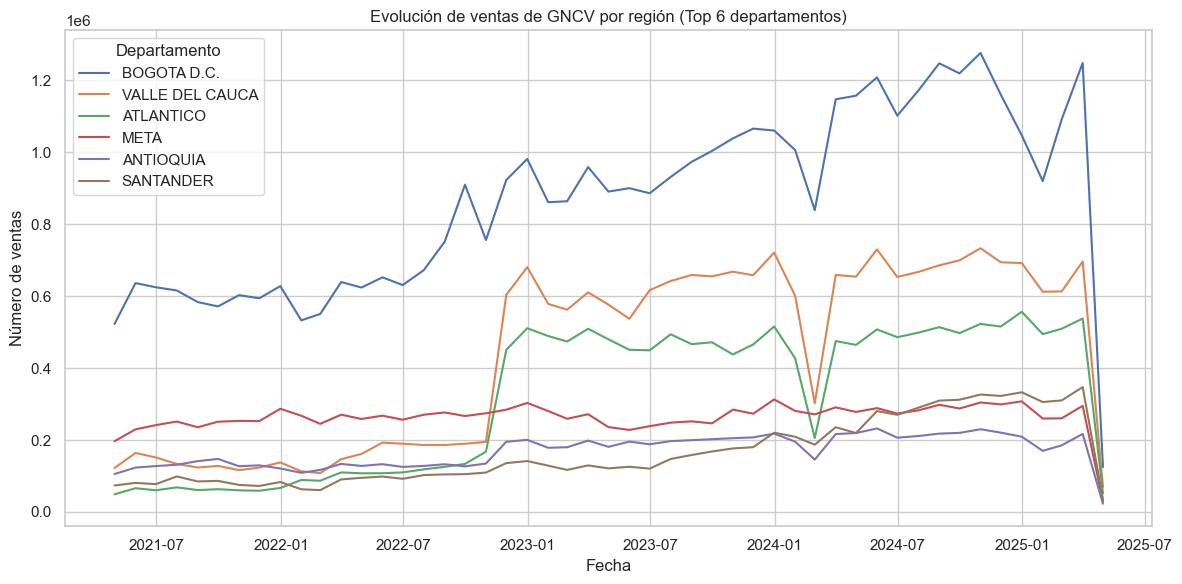

In [38]:
df['FECHA_VENTA'] = pd.to_datetime(df['FECHA_VENTA'])

ventas_por_region_tiempo = df.groupby([pd.Grouper(key='FECHA_VENTA', freq='M'), 'DEPARTAMENTO'])['NUMERO_DE_VENTAS'].sum().reset_index()

top_departamentos = ventas_por_region_tiempo.groupby('DEPARTAMENTO')['NUMERO_DE_VENTAS'].sum().nlargest(6).index

ventas_top = ventas_por_region_tiempo[ventas_por_region_tiempo['DEPARTAMENTO'].isin(top_departamentos)]

plt.figure(figsize=(12, 6))
for depto in top_departamentos:
    datos = ventas_top[ventas_top['DEPARTAMENTO'] == depto]
    plt.plot(datos['FECHA_VENTA'], datos['NUMERO_DE_VENTAS'], label=depto)

plt.title("Evolución de ventas de GNCV por región (Top 6 departamentos)")
plt.xlabel("Fecha")
plt.ylabel("Número de ventas")
plt.legend(title="Departamento")
plt.grid(True)
plt.tight_layout()
plt.show()

Bogotá D.C. lidera consistentemente las ventas de GNCV, con un crecimiento sostenido a lo largo del tiempo, seguido por Valle del Cauca, Atlántico y Meta. La tendencia ascendente sugiere una expansión progresiva en el uso de este combustible, lo que respalda políticas de movilidad sostenible. También se observan variaciones estacionales y picos abruptos que podrían estar asociados a factores económicos, normativos o logísticos. Esta información es valiosa para planificar la expansión de infraestructura y estrategias de transición energética.

# Distribuciones


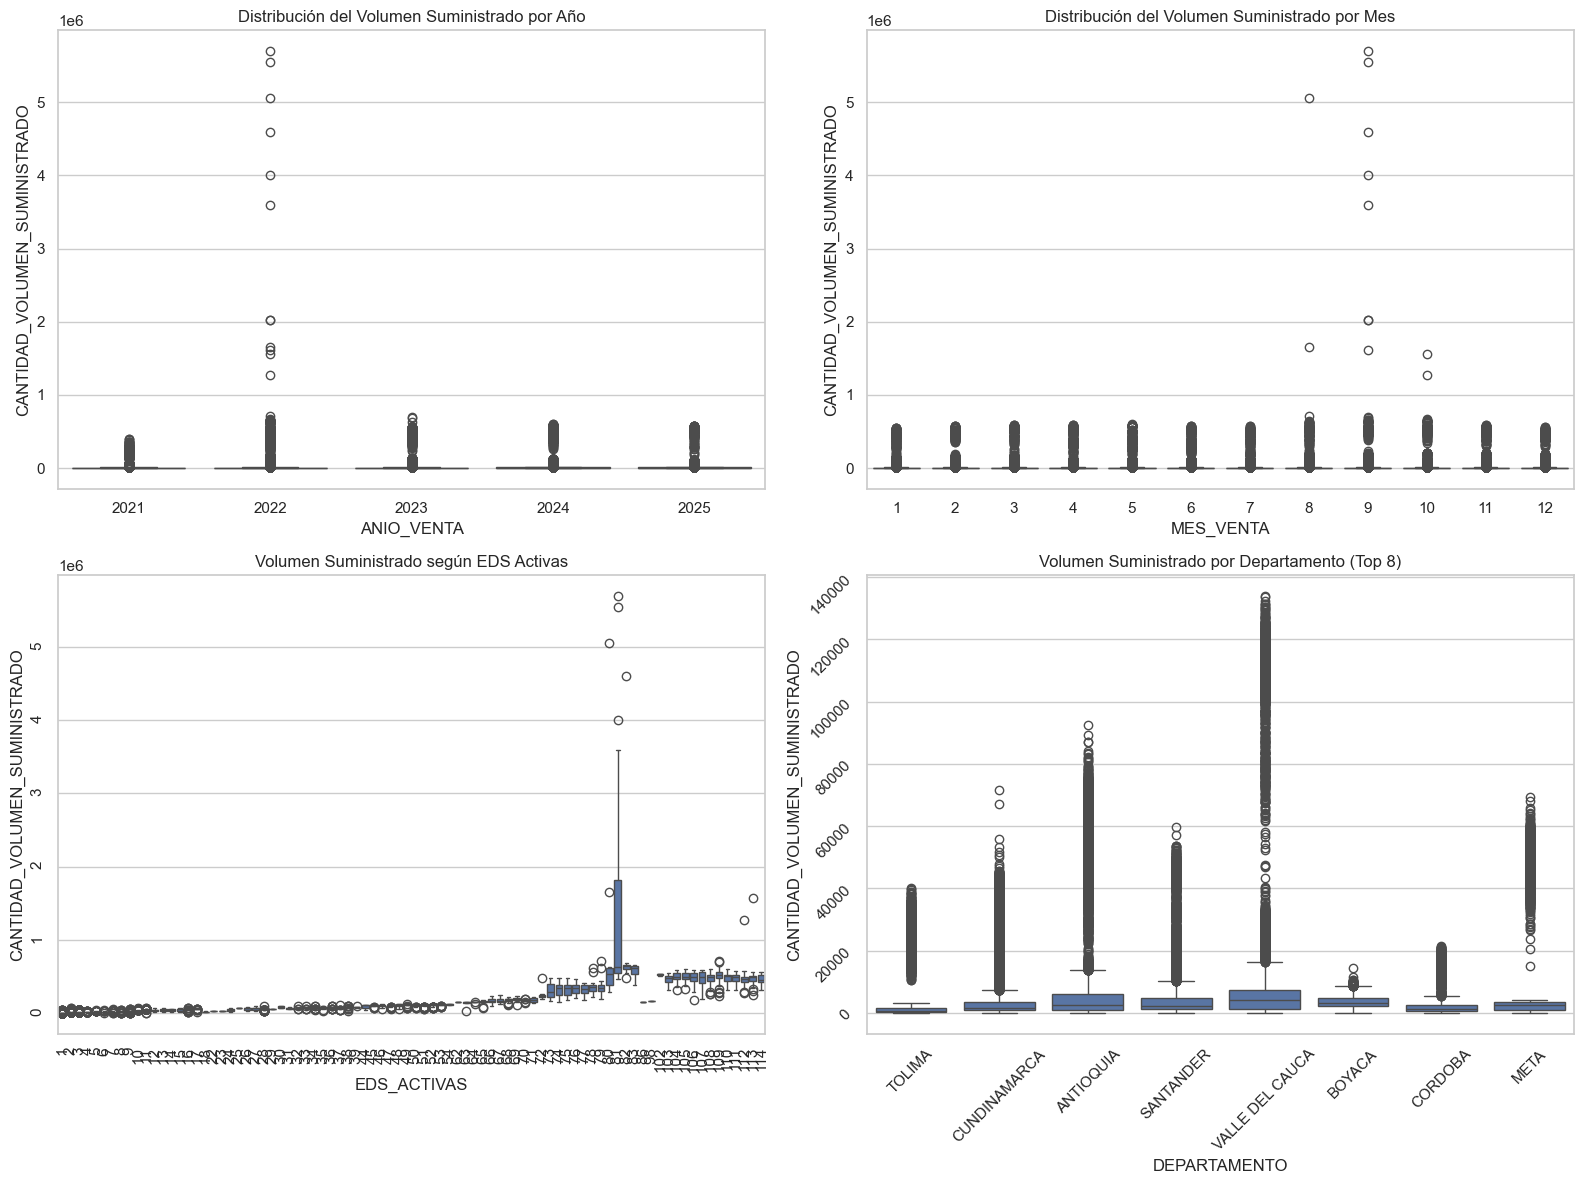

In [39]:
sns.set(style="whitegrid")

# Gráficos tipo boxplot
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(data=df, x='ANIO_VENTA', y='CANTIDAD_VOLUMEN_SUMINISTRADO', ax=axs[0, 0])
axs[0, 0].set_title("Distribución del Volumen Suministrado por Año")

# Boxplot 2: Volumen suministrado por mes
sns.boxplot(data=df, x='MES_VENTA', y='CANTIDAD_VOLUMEN_SUMINISTRADO', ax=axs[0, 1])
axs[0, 1].set_title("Distribución del Volumen Suministrado por Mes")

# Boxplot 3: Volumen suministrado por número de EDS activas
sns.boxplot(data=df, x='EDS_ACTIVAS', y='CANTIDAD_VOLUMEN_SUMINISTRADO', ax=axs[1, 0])
axs[1, 0].set_title("Volumen Suministrado según EDS Activas")
axs[1, 0].tick_params(labelrotation=90)

# Boxplot 4: Volumen suministrado por departamento (solo top 8)
top_departamentos = df['DEPARTAMENTO'].value_counts().head(8).index
sns.boxplot(data=df[df['DEPARTAMENTO'].isin(top_departamentos)], 
            x='DEPARTAMENTO', y='CANTIDAD_VOLUMEN_SUMINISTRADO', ax=axs[1, 1])
axs[1, 1].set_title("Volumen Suministrado por Departamento (Top 8)")
axs[1, 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

- Por Año: Se observa una ligera tendencia creciente en los volúmenes suministrados con el tiempo, aunque con cierta variabilidad en 2023 y 2024, lo que podría indicar un aumento en la demanda o mejoras en la infraestructura de distribución.

- Por Mes: Hay mayor variabilidad en algunos meses como enero y marzo. Estos picos pueden estar relacionados con factores estacionales, vacaciones o ciclos económicos que afectan el consumo de gas.

- Por EDS activas: A medida que aumenta el número de estaciones de servicio activas (EDS), también lo hace el volumen suministrado, aunque con mayor dispersión, lo que sugiere que la eficiencia o demanda puede variar entre estaciones.

- Por Departamento (Top 8): Algunos departamentos como TOLIMA y CUNDINAMARCA muestran volúmenes más altos y mayor dispersión, lo que puede reflejar diferencias en infraestructura, consumo vehicular o políticas regionales de energía.

Aunque el gráfico conjunto de cajas y bigotes sugiere que algunas variables como NUMERO_DE_VENTAS están cerca de cero, esto se debe a la diferencia de escalas entre variables

# Relación entre el número de ventas y el volumen de GNCV suministrado en Colombia


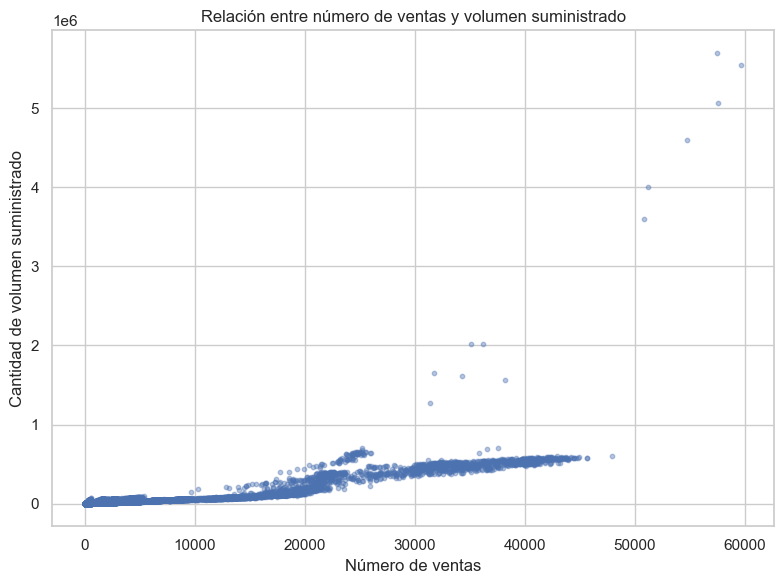

In [40]:
# Crear un scatter plot entre número de ventas y volumen suministrado
plt.figure(figsize=(8, 6))
plt.scatter(df['NUMERO_DE_VENTAS'], df['CANTIDAD_VOLUMEN_SUMINISTRADO'], alpha=0.4, s=10)
plt.title("Relación entre número de ventas y volumen suministrado")
plt.xlabel("Número de ventas")
plt.ylabel("Cantidad de volumen suministrado")
plt.grid(True)
plt.tight_layout()
plt.show()

Se muestra una relación positiva clara entre el número de ventas y la cantidad de volumen suministrado: a mayor número de ventas, mayor volumen entregado. Sin embargo, la dispersión de los puntos sugiere cierta variabilidad en el volumen por venta

# Relación Entre Vehículos Atendidos Y Volumen Suministrado

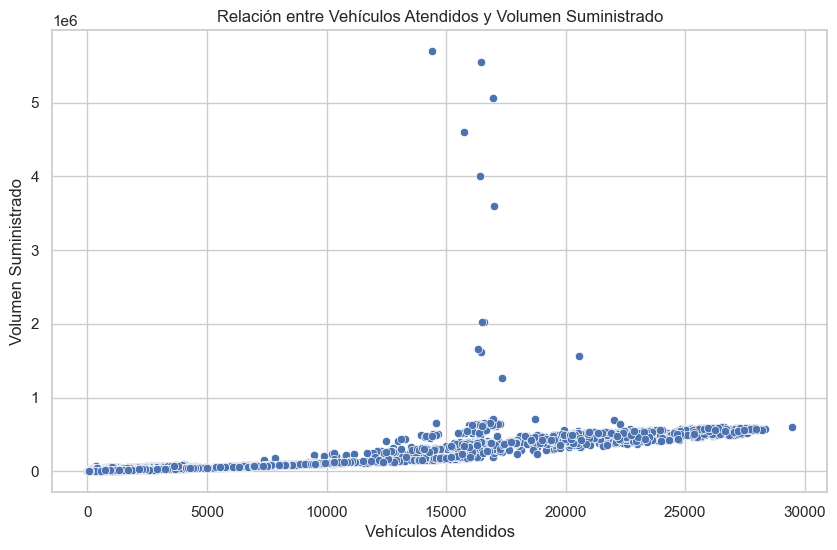

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='VEHICULOS_ATENDIDOS', y='CANTIDAD_VOLUMEN_SUMINISTRADO')
plt.title("Relación entre Vehículos Atendidos y Volumen Suministrado")
plt.xlabel("Vehículos Atendidos")
plt.ylabel("Volumen Suministrado")
plt.grid(True)
plt.show()

Se observa una relación positiva entre los vehículos atendidos y el volumen suministrado. La mayoría de los datos siguen una línea creciente, lo que sugiere que a más vehículos atendidos, más gas se vende. Sin embargo, algunos puntos muestran una eficiencia variable (por ejemplo, mucho volumen suministrado a pocos vehículos), lo cual podría deberse a vehículos con tanques más grandes o usos no convencionales del combustible.

# Distribución Del Volumen Suministrado En Función De La Latitud

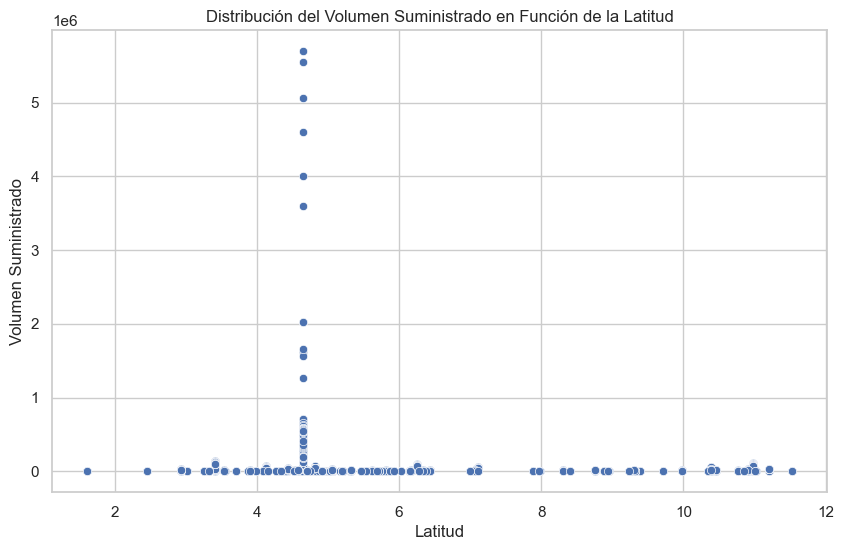

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LATITUD', y='CANTIDAD_VOLUMEN_SUMINISTRADO')
plt.title("Distribución del Volumen Suministrado en Función de la Latitud")
plt.xlabel("Latitud")
plt.ylabel("Volumen Suministrado")
plt.grid(True)
plt.show()

El gráfico de latitud versus volumen suministrado ofrece una perspectiva geográfica del consumo. Se aprecia que hay una concentración de volúmenes altos en un rango específico de latitudes, que probablemente corresponda a zonas urbanas o industriales del país, como Bogotá, Medellín o Cali. A medida que nos alejamos de esas latitudes, la dispersión disminuye, lo que sugiere menor actividad en regiones más al norte o sur.

# Correlación de Pearson

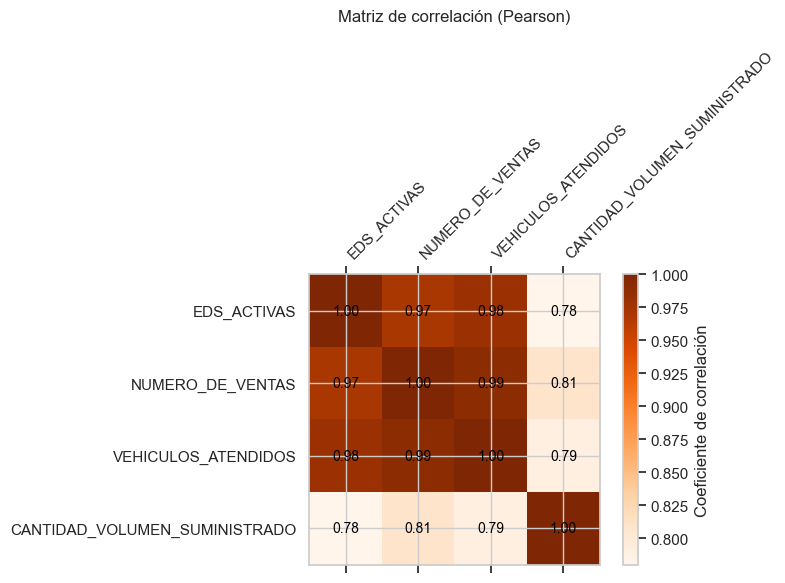

In [43]:
numeric_cols = ['EDS_ACTIVAS', 'NUMERO_DE_VENTAS', 'VEHICULOS_ATENDIDOS', 'CANTIDAD_VOLUMEN_SUMINISTRADO']

# Pearson
corr = df[numeric_cols].corr(method='pearson').round(2)

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(corr, cmap="Oranges")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="left")
plt.yticks(range(len(corr.index)), corr.index)

# Agregar los valores a cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        value = corr.iloc[j, i]
        ax.text(i, j, f"{value:.2f}", va='center', ha='center', color='black', fontsize=10)

# Colorbar
fig.colorbar(cax, label="Coeficiente de correlación")
plt.title("Matriz de correlación (Pearson)", pad=20)
plt.tight_layout()
plt.show()

La matriz de correlación revela una fuerte relación entre el número de estaciones activas, las ventas y los vehículos atendidos, lo que indica que estas variables están estrechamente ligadas y podrían contener información redundante. Aunque el volumen suministrado también está correlacionado con ellas, su relación es ligeramente menor, lo que sugiere mayor variabilidad en el consumo por venta o vehículo. En conjunto, estas correlaciones sugieren la necesidad de reducir multicolinealidad en modelos y explorar factores que influyen en el volumen más allá de la cantidad de ventas.

# Correlación de Spearman

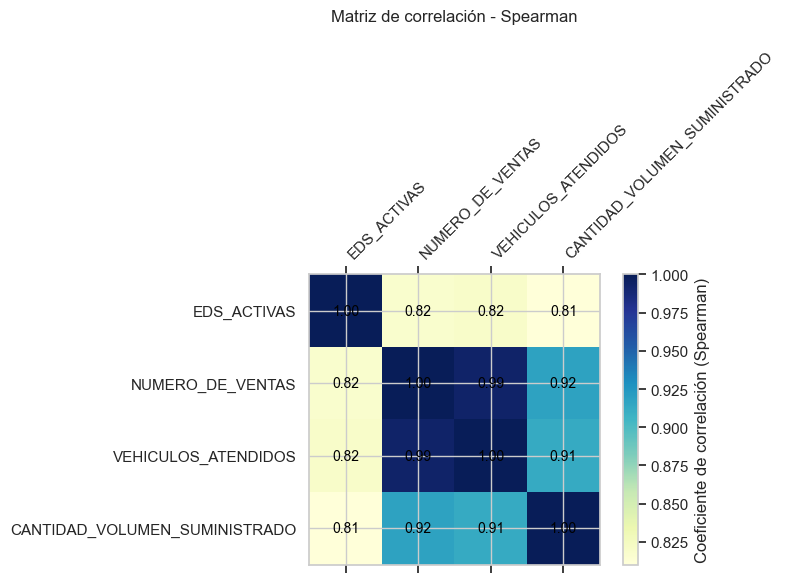

In [44]:
corr_spearman = df[numeric_cols].corr(method='spearman').round(3)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_spearman, cmap='YlGnBu')

plt.xticks(range(len(corr_spearman.columns)), corr_spearman.columns, rotation=45, ha='left')
plt.yticks(range(len(corr_spearman.index)), corr_spearman.index)

for i in range(len(corr_spearman.columns)):
    for j in range(len(corr_spearman.index)):
        value = corr_spearman.iloc[j, i]
        ax.text(i, j, f"{value:.2f}", va='center', ha='center', color='black', fontsize=10)

fig.colorbar(cax, label="Coeficiente de correlación (Spearman)")
plt.title("Matriz de correlación - Spearman", pad=20)
plt.tight_layout()
plt.show()

La matriz de correlación de Spearman muestra relaciones fuertemente positivas entre todas las variables, especialmente entre NUMERO_DE_VENTAS, VEHICULOS_ATENDIDOS y CANTIDAD_VOLUMEN_SUMINISTRADO, con coeficientes superiores a 0.9. Esto indica una fuerte asociación monótona, incluso en presencia de posibles outliers. Las estaciones activas (EDS_ACTIVAS) también presentan alta correlación, aunque ligeramente menor, lo que sugiere variaciones en la productividad entre estaciones.

# Comparación entre Pearson y Spearman
La comparación entre las correlaciones de Pearson y Spearman muestra resultados muy similares, lo que indica que las relaciones entre las variables numéricas son tanto lineales como monótonas. Esto sugiere que las asociaciones observadas son consistentes y robustas, incluso en presencia de posibles valores atípicos o distribuciones no normales, validando la fuerza de las relaciones entre ventas, vehículos atendidos, volumen suministrado y estaciones activas.

# Uso de PLoty Dash

In [45]:
%pip install dash
%pip install folium
%pip install plotly
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import plotly.express as px
import locale

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    # Manejar la excepción si la configuración regional no es compatible
    print("La configuración regional 'es_ES.UTF-8' no es compatible con este sistema.")
    print("Se usará la configuración regional predeterminada del sistema.")

In [47]:
data = pd.read_csv("consulta_ventas_gas_natural.csv", sep=None, engine='python')
print(data.columns)
print(data.head(1))


Index(['FECHA_VENTA', 'ANIO_VENTA', 'MES_VENTA', 'DIA_VENTA',
       'CODIGO_MUNICIPIO_DANE', 'DEPARTAMENTO', 'MUNICIPIO', 'LATITUD',
       'LONGITUD', 'TIPO_AGENTE', 'TIPO_DE_COMBUSTIBLE', 'EDS_ACTIVAS',
       'NUMERO_DE_VENTAS', 'VEHICULOS_ATENDIDOS',
       'CANTIDAD_VOLUMEN_SUMINISTRADO'],
      dtype='object')
  FECHA_VENTA  ANIO_VENTA  MES_VENTA  DIA_VENTA  CODIGO_MUNICIPIO_DANE  \
0  2023-03-04        2023          3          4                  73001   

  DEPARTAMENTO MUNICIPIO   LATITUD   LONGITUD                   TIPO_AGENTE  \
0       TOLIMA    IBAGUE  4.432248 -75.194252  ESTACION DE SERVICIO DE GNCV   

  TIPO_DE_COMBUSTIBLE  EDS_ACTIVAS  NUMERO_DE_VENTAS  VEHICULOS_ATENDIDOS  \
0                 GNV           11              4623                 2158   

   CANTIDAD_VOLUMEN_SUMINISTRADO  
0                       30137.81  


In [48]:
# Cargar datos
data['FECHA_VENTA'] = pd.to_datetime(data['FECHA_VENTA'], errors='coerce')

data["DEPARTAMENTO"] = data["DEPARTAMENTO"].str.upper()

# Agregar nombre del mes en español
data['NOMBRE_MES'] = data['FECHA_VENTA'].dt.strftime('%B').str.capitalize()

# Cargar geojson
colombia_geo = gpd.read_file('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/Colombia.geo.json')


# Inicializar la app
app = dash.Dash(__name__, external_stylesheets=['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css'])

app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label="Mapa Coroplético", children=[
            html.Div([
                html.H3("Promedio de Volumen Suministrado por Departamento y Año"),
                dcc.Dropdown(
                    id="anio-dropdown",
                    options=[{"label": str(a), "value": a} for a in sorted(data['ANIO_VENTA'].unique())],
                    value=sorted(data['ANIO_VENTA'].unique())[0],
                    clearable=False
                ),
                html.Iframe(id="mapa", width="100%", height="600px")
            ])
        ]),
        dcc.Tab(label="Comparación por Departamento", children=[
            html.Div([
                dcc.Dropdown(
                    id="departamento-dropdown",
                    options=[{"label": d, "value": d} for d in sorted(data['DEPARTAMENTO'].unique())],
                    value=sorted(data['DEPARTAMENTO'].unique())[0],
                    clearable=False
                ),
                dcc.Dropdown(
                    id="anio-dropdown-barras",
                    options=[{"label": str(a), "value": a} for a in sorted(data['ANIO_VENTA'].unique())],
                    value=sorted(data['ANIO_VENTA'].unique())[0],
                    clearable=False
                ),
                dcc.Graph(id="barras-departamento")
            ])
        ])
    ])
])

@app.callback(
    Output("mapa", "srcDoc"),
    Input("anio-dropdown", "value")
)
def update_map(selected_year):
    df_filtered = data[data['ANIO_VENTA'] == selected_year]
    data_grouped = df_filtered.groupby("DEPARTAMENTO", as_index=False)["CANTIDAD_VOLUMEN_SUMINISTRADO"].mean()

    merged_data = colombia_geo.merge(data_grouped, left_on="NOMBRE_DPT", right_on="DEPARTAMENTO", how="left")
    merged_data["CANTIDAD_VOLUMEN_SUMINISTRADO"].fillna(0, inplace=True)

    m = folium.Map(location=[4, -72], zoom_start=5)
    choropleth = folium.Choropleth(
        geo_data=merged_data,
        name="choropleth",
        data=merged_data,
        columns=["NOMBRE_DPT", "CANTIDAD_VOLUMEN_SUMINISTRADO"],
        key_on="feature.properties.NOMBRE_DPT",
        fill_color="YlGnBu",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name="Volumen Promedio"
    ).add_to(m)

    folium.GeoJson(
        merged_data,
        name="tooltip",
        style_function=lambda x: {"fillColor": "transparent", "color": "transparent"},
        tooltip=GeoJsonTooltip(
            fields=["NOMBRE_DPT", "CANTIDAD_VOLUMEN_SUMINISTRADO"],
            aliases=["Departamento:", "Volumen Promedio:"],
            localize=True
        )
    ).add_to(m)

    return m._repr_html_()

@app.callback(
    Output("barras-departamento", "figure"),
    [Input("anio-dropdown-barras", "value"),
     Input("departamento-dropdown", "value")]
)
def update_barras(selected_year, selected_departamento):
    df_filtered = data[
        (data['ANIO_VENTA'] == selected_year) &
        (data['DEPARTAMENTO'] == selected_departamento)
    ]

    grouped = df_filtered.groupby("NOMBRE_MES", as_index=False)["NUMERO_DE_VENTAS"].sum()

    meses_orden = [
        'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
    ]
    grouped["NOMBRE_MES"] = pd.Categorical(grouped["NOMBRE_MES"], categories=meses_orden, ordered=True)
    grouped = grouped.sort_values("NOMBRE_MES")

    fig = px.bar(
        grouped,
        x="NOMBRE_MES",
        y="NUMERO_DE_VENTAS",
        title=f"Número de Ventas Mensual - {selected_departamento} ({selected_year})",
        labels={"NUMERO_DE_VENTAS": "Número de Ventas", "NOMBRE_MES": "Mes"},
        color="NUMERO_DE_VENTAS",
        color_continuous_scale="Plasma"
    )
    return fig

if __name__ == "__main__":
    app.run(debug=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_18836\2872210008.py:59: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



